In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import *

from functionsSqueeze import w, wdot, H


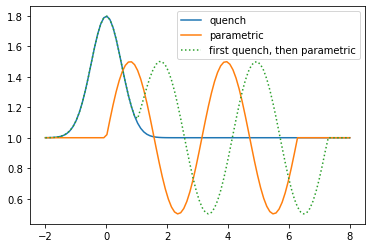

In [2]:
# plot different frequency modulations
tlist = np.linspace(-2,8,100)
wQuench = w(tlist, w0=1, dwQ=1, dtQ=0.5)
wQuenchD = wdot(tlist, w0=1, dwQ=1, dtQ=0.5)
wParam = w(tlist, w0=1, dwP=0.5, dtP=4*np.pi/2)
wBoth = w(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0.5, dtP=4*np.pi/2, delay=1)

plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wQuenchD, label="quench diff")
plt.plot(tlist, wParam, label="parametric")
plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()

In [15]:
n = 50
psi0 = thermal_dm(n,0.1)

argsQ = {'a1': 1,
       'a2': 1,
       'a3': 0.2,
       'a4': 0,
       'a5': 0,
       'a6': 0,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

argsP = {'a1': 1,
       'a2': 0,
       'a3': 0.1,
       'a4': 0.5,
       'a5': 4*np.pi/2,
       'a6': 0,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

argsQP = {'a1': 1,
       'a2': 1,
       'a3': 0.5,
       'a4': 0.5,
       'a5': 4*np.pi/2,
       'a6': 1,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

In [16]:
timesQ = np.linspace(-2,5,300)
resultQ = mesolve(H, psi0, timesQ, args=argsQ)

In [17]:
timesP = np.linspace(-1,10,400)
resultP = mesolve(H, psi0, timesP, args=argsP)

In [18]:
timesQP = np.linspace(-2,12,600)
resultQP = mesolve(H, psi0, timesQP, args=argsQP)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x171AAD30>,
       dtype=object))

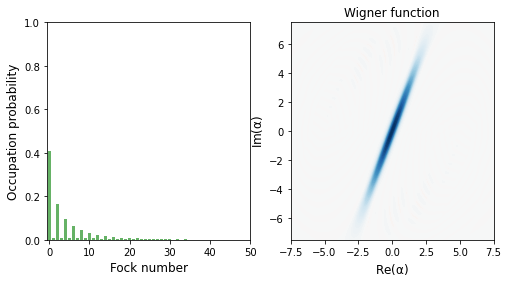

In [31]:
psi = resultP.states[-1]

plot_wigner_fock_distribution(psi)

0j (1.5264092256912218+0j) (-0.7557086427586277+0j) (4.805541643300343+0j) (0.016904873788996966+0j)


(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1753C630>,
       dtype=object))

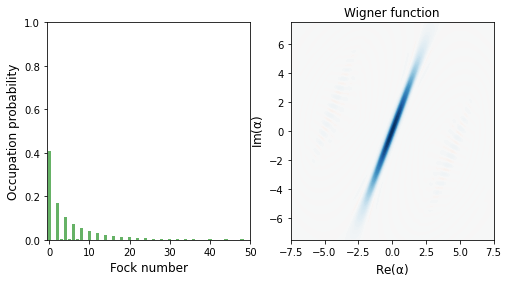

In [32]:
# dimensionless position and momentum operators
n = 50
ad = create(n)
a = destroy(n)
x = (ad + a)
p = 1j*(ad - a)

xV = variance(x, psi)
pV = variance(p, psi)

xiR = np.arcsinh(0.5*np.sqrt(xV + pV - 2 +0j))
xiT1 = 0.25*(pV - xV)/(np.cosh(xiR)*np.sinh(xiR))
xiT = -np.sign(xiT1)*np.arccos(xiT1)
xi = xiR*np.exp(1j*xiT)
# alpha = 0.5*np.sqrt(xV + pV)
alpha = expect(a, psi)
nCS = np.abs(alpha)**2 + np.sinh(xiR)**2
nT = expect(ad*a, psi) - nCS


print(alpha, xiR, xiT, nCS, nT)

psi1 = displace(n, expect(a, psi))*squeeze(n, xi)*thermal_dm(n, nT)*squeeze(n, xi).dag()*displace(n, expect(a, psi)).dag()
plot_wigner_fock_distribution(psi1)

In [85]:
psi0

Quantum object: dims = [[50], [50]], shape = (50, 50), type = oper, isherm = True
Qobj data =
[[7.69230769e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.77514793e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.09649522e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.02439427e-31
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.08255252e-31 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.80589044e-32]]

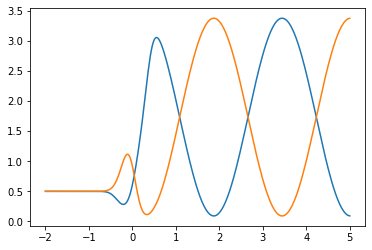

In [8]:
# dimensionless position and momentum operators
ad = create(n)
a = destroy(n)
x = 1/np.sqrt(2)*(ad + a)
p = 1/np.sqrt(2)*(ad - a)

# plot variance of x and p with time
varX = expect(x*x.dag(), resultQ.states)
varP = expect(p*p.dag(), resultQ.states)
plt.plot(timesQ, varX, label = "variance of x")
plt.plot(timesQ, varP, label = "variance of p")

(2.3362607071548522+0j)
-0.7835077920354883


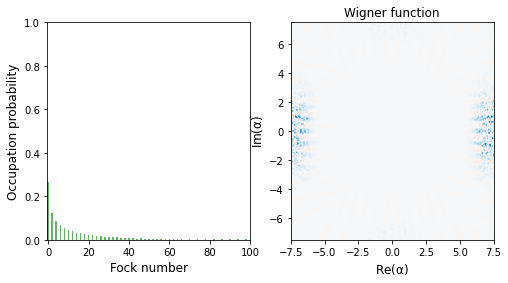

In [39]:
# check formulas
n = 100

psi = squeeze(n, -2)*fock(n)

ad = create(n)
a = destroy(n)
x = (ad + a)
p = 1j*(ad - a)

plot_wigner_fock_distribution(psi)

# numb = ad*a
vX = expect(x*x, psi)# - expect(x, psi)**2
vP = expect(p*p, psi)# - expect(p, psi)**2
print(1/2*np.arccosh(vX+vP + 0j))
print(1/4*np.log(vP/vX))

In [40]:
np.exp(1j*2)

(-0.4161468365471424+0.9092974268256817j)